In [1]:
# we will try with etf 

#first import the libraries
%reset
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpp
import seaborn as sns
from datetime import datetime

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#variables
stockStartDate = '2010-01-01'
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-07-31'

In [3]:
df = pd.DataFrame()

# store adjusted close price
df =web.DataReader('ES3.SI',data_source='yahoo',start= stockStartDate, end = today)
df = df.sort_index(ascending=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,2.97,2.95,2.97,2.97,423000.0,2.377877
2010-01-05,3.00,2.97,2.97,2.99,190000.0,2.393890
2010-01-06,3.01,2.99,3.00,3.00,493000.0,2.401896
2010-01-07,3.01,2.97,3.00,2.98,167000.0,2.385884
2010-01-08,3.00,2.98,2.99,2.99,113000.0,2.393890


In [4]:
# check index type
print(df.index.dtype)
# check for missing columns
df.isnull().sum()


datetime64[ns]


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
# get the day of week and store it in a new column
dt_day = df.index.weekday
df['day'] = dt_day
# get day of the month and store it in a new column
dt_day_of_month = df.index.day
df['day_of_month'] = dt_day_of_month
# get the month and store it in a new column
dt_month = df.index.month
df['month'] = dt_month
df.head()

,High,Low,Open,Close,Volume,Adj Close,day,day_of_month,month
Date,,,,,,,,,
2010-01-04,2.97,2.95,2.97,2.97,423000.0,2.377877,0,4,1
2010-01-05,3.00,2.97,2.97,2.99,190000.0,2.393890,1,5,1
2010-01-06,3.01,2.99,3.00,3.00,493000.0,2.401896,2,6,1
2010-01-07,3.01,2.97,3.00,2.98,167000.0,2.385884,3,7,1
2010-01-08,3.00,2.98,2.99,2.99,113000.0,2.393890,4,8,1


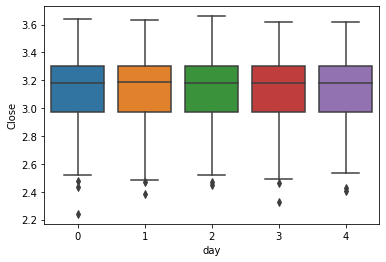

In [6]:
# Step 9a: Plot boxplots of close prices, separated by day of week 
sns.boxplot(x='day',y='Close',data=df)

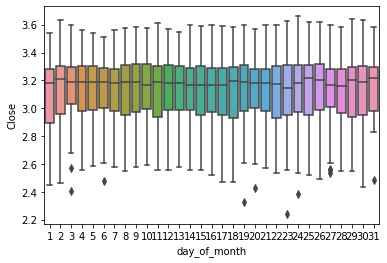

In [7]:
# Plot boxplots of close prices, separated by day of month
sns.boxplot(x='day_of_month',y='Close',data=df)

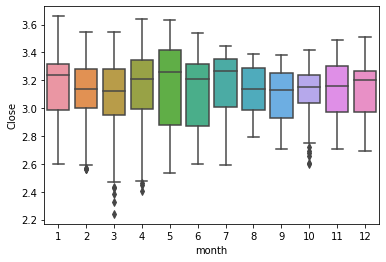

In [8]:
# Plot boxplots of close prices, separated by month
sns.boxplot(x='month',y='Close',data=df)

ok not much deviation == no seasonal changes

In [9]:
# Dummify the day, day_of_month, and month columns and store each of them in a variable
day_dummies = pd.get_dummies(df['day'], prefix='day')
day_of_month_dummies = pd.get_dummies(df['day_of_month'], prefix='dayofmonth')
month_dummies = pd.get_dummies(df['month'], prefix='month')
dummfied_dates = pd.concat([day_dummies,day_of_month_dummies,month_dummies],axis=1)
dummfied_dates.head()


,day_0,day_1,day_2,day_3,day_4,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-05,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2010-01-06,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-07,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-08,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Get your final DataFrame
final_df = pd.concat([df['Open'],df['Close'],df['Volume'],dummfied_dates],axis=1)
final_df.head()

,Open,Close,Volume,day_0,day_1,day_2,day_3,day_4,dayofmonth_1,dayofmonth_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2.97,2.97,423000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-05,2.97,2.99,190000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-06,3.00,3.00,493000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-07,3.00,2.98,167000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-08,2.99,2.99,113000.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Prepare your independent and dependent variables
close_prices = final_df['Close']
final_df = final_df.drop(columns=['Close'])
final_df.head()

,Open,Volume,day_0,day_1,day_2,day_3,day_4,dayofmonth_1,dayofmonth_2,dayofmonth_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2.97,423000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-05,2.97,190000.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-06,3.00,493000.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-07,3.00,167000.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-08,2.99,113000.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
the_index = int(len(final_df)*0.8)
X_train, X_test = final_df.iloc[:the_index], final_df.iloc[the_index:]
y_train, y_test =close_prices.iloc[:the_index], close_prices.iloc[the_index:]

0.023576404522396777
linear regressor confidence 0.9916239889894931


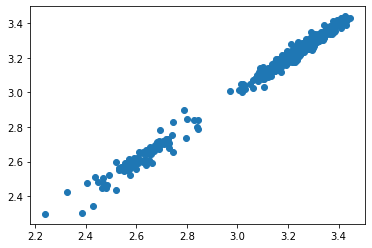

In [13]:
# Step 12a: Declare a variable to store your chosen model
lr = LinearRegression()
# Step 12b: Fit your train dataset
lr = lr.fit(X_train,y_train)
# Step 12c: Declare a variable and store your predictions using X test data
predictions_lr = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions_lr))
print(rmse)
print('linear regressor confidence',lr.score(X_test,y_test))
# Step 12e: Plot test dependent variables vs predictions
mpp.scatter(y_test,predictions_lr)

In [14]:
df_predict = pd.DataFrame({'predicted_price': predictions_lr })
df_predict.index = final_df.index[the_index:]

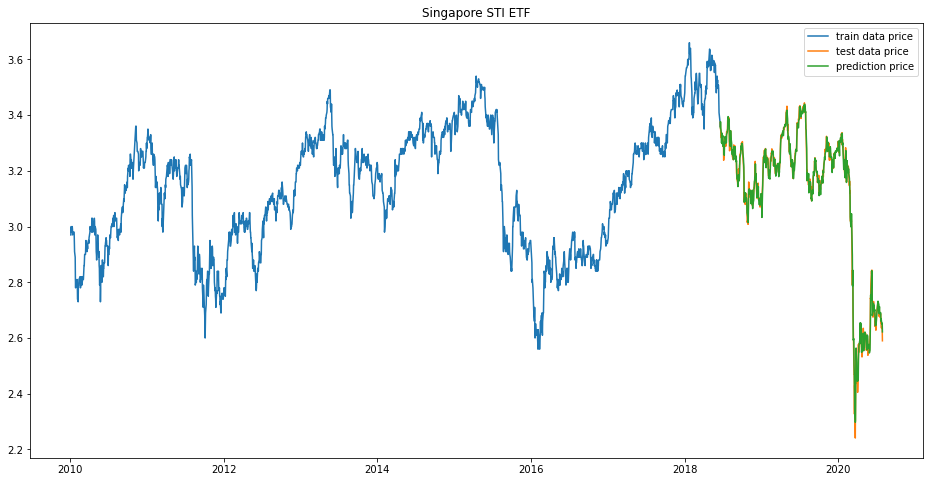

In [15]:
mpp.figure(figsize=(16,8))
mpp.plot(y_train,label='train data price')
mpp.plot(y_test, label='test data price')
mpp.plot(df_predict, label= 'prediction price')
mpp.title('Singapore STI ETF')
mpp.legend()
mpp.show()

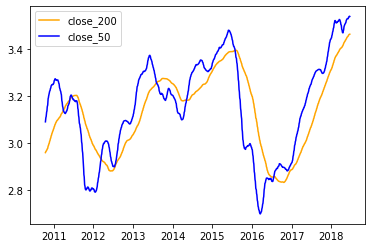

In [16]:
df_new = y_train.to_frame()
close_50 = df_new.rolling(window=50).mean()
close_200 = df_new.rolling(window=200).mean()
df_new['close_50']=close_50
df_new['close_200']=close_200
df_new = df_new.dropna()
# plot sma
mpp.plot(df_new['close_200'],color='orange',label='close_200')
mpp.plot(df_new['close_50'],color='blue',label='close_50')
mpp.legend()
mpp.show()

In [17]:
df_new.head()

,Close,close_50,close_200
Date,,,
2010-10-18,3.23,3.0908,2.95995
2010-10-19,3.24,3.0950,2.96130
2010-10-20,3.21,3.0986,2.96240
2010-10-21,3.23,3.1034,2.96355
2010-10-22,3.21,3.1082,2.96470


In [18]:
# Step 11: Implement a simple SMA crossover strategy (Hard)
import numpy as np
# initialize a variable called "shares", and assign 100 to it - this is the number of shares you have at the start
shares = 100

# initialize a variable called "cash", and assign 0 to it - this is how much liquid money you have at the start
cash = 0

# initialize an empty list called "portfolio_sma"
portfolio_sma =[]

# initialize an empty list called "cash_list"
cash_list = []

#signal to buy
sigBuyPrice = []
# signal to sell
sigSellPrice = []

# loop through the DataFrame. Hint: iterrows will be useful here
for index, row in df_new.iterrows():
    close_50 = row['close_50']
    close_200 = row['close_200']
    close_price = row['Close']
    # in a particular row, check if "close_50" is more than "close_200"
    if ( close_50 > close_200):
        # if "close_50" is more than "close_200", check if "shares" > 0
        if shares > 0:
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigBuyPrice.append(np.nan)
            sigSellPrice.append(np.nan)
            
        # else
        else:
            # declare "shares" to be equals to "cash" divided by the row's "4. close"
            shares = cash / close_price
            # declare "cash" to be 0 (because you spent it all buying "shares")
            cash = 0
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigBuyPrice.append(close_price)
            sigSellPrice.append(np.nan)

    # else in this case you have "close_200" more than "close_50"
    else:
        # check if you have "shares", i.e. more than 0. Because you have to sell your shares
        if shares > 0:
            # update the value of "cash" to be "shares" multiplied by the row's "4. close"
            cash = shares * close_price
            # update "shares" to be 0 (because you sold all your shares)
            shares = 0
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigBuyPrice.append(np.nan)
            sigSellPrice.append(close_price)
        # else
        else:
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigBuyPrice.append(np.nan)
            sigSellPrice.append(np.nan)



# declare a new column named "portfolio_sma" in your DataFrame which contains "portfolio_sma"
df_new['portfolio_sma'] = portfolio_sma
# declare a new column named "cash_sma" in your DataFrame which contains "cash_list"
df_new['cash_sma'] = cash_list

df_new['sigBuyPrice'] = sigBuyPrice
df_new['sigSellPrice'] = sigSellPrice

# check your DataFrame
df_new

,Close,close_50,close_200,portfolio_sma,cash_sma,sigBuyPrice,sigSellPrice
Date,,,,,,,
2010-10-18,3.230,3.09080,2.959950,323.000002,0.0,NaN,NaN
2010-10-19,3.240,3.09500,2.961300,324.000001,0.0,NaN,NaN
2010-10-20,3.210,3.09860,2.962400,321.000004,0.0,NaN,NaN
2010-10-21,3.230,3.10340,2.963550,323.000002,0.0,NaN,NaN
2010-10-22,3.210,3.10820,2.964700,321.000004,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2018-06-12,3.497,3.53862,3.461355,392.348219,0.0,NaN,NaN
2018-06-13,3.446,3.53894,3.462035,386.626254,0.0,NaN,NaN
2018-06-14,3.409,3.53892,3.462480,382.474995,0.0,NaN,NaN


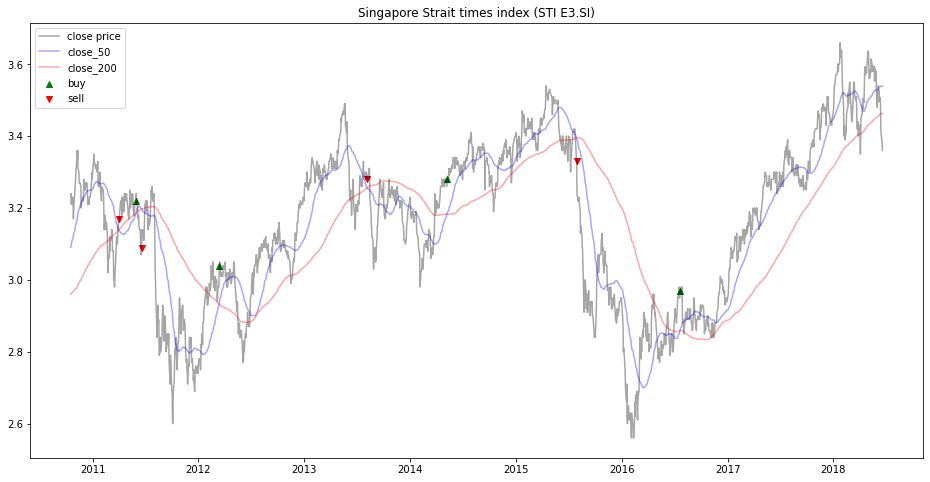

In [19]:
mpp.figure(figsize=(16,8))
# visualise the strategy
mpp.plot(df_new['Close'],color='black',label='close price',alpha=0.35)
mpp.plot(df_new['close_50'],color='blue',label='close_50',alpha=0.35)
mpp.plot(df_new['close_200'],color='red',label='close_200',alpha=0.35)
mpp.scatter(df_new.index, df_new['sigBuyPrice'],label='buy',marker='^',color='green')
mpp.scatter(df_new.index, df_new['sigSellPrice'],label='sell',marker='v',color='red')
mpp.title('Singapore Strait times index (STI E3.SI)')
mpp.legend()
mpp.show()

In [20]:
starting_amt = df_new['Close'].iloc[0]*df_new['portfolio_sma'].iloc[0] + df_new['cash_sma'].iloc[0]
print('starting amount : ', starting_amt)
current_amt = df_new['Close'].iloc[-1]*df_new['portfolio_sma'].iloc[-1] + df_new['cash_sma'].iloc[-1]
print('current amount : ',current_amt )
p_change = (current_amt - starting_amt)*100 / starting_amt
print('% change : ', p_change)
years =int( df_new.index[-1].year) -int( df_new.index[0].year) 
interest = p_change/years
print('annual interest : ', interest)

starting amount :  1043.2900123214722
current amount :  1266.6440402256549
% change :  21.40862322713005
annual interest :  2.6760779033912563


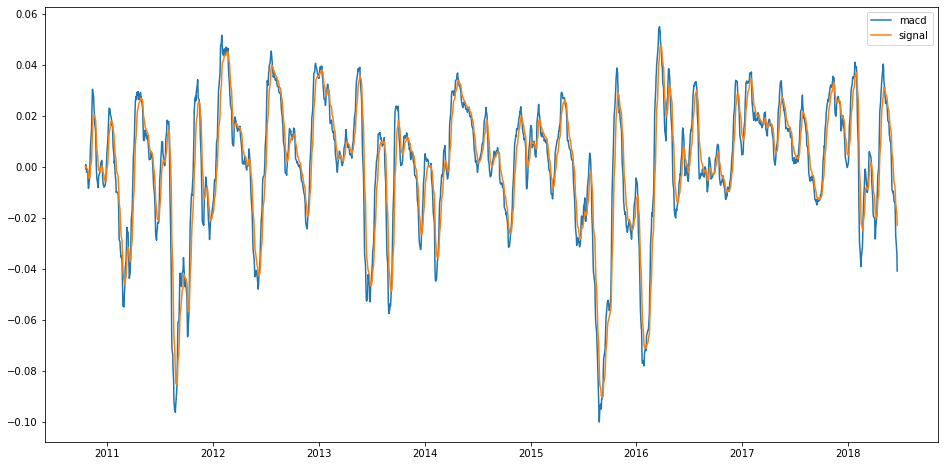

In [21]:
# short term last 12 periods
shortEMA = df_new['Close'].ewm(span=12,adjust=False).mean()
# long term last 26 periods
longEMA = df_new['Close'].ewm(span=26,adjust=False).mean()
# macd line
macd = shortEMA - longEMA
#signal line
signal = macd.ewm(span=9,adjust=False).mean()
df_new['macd'] = macd
df_new['signal']= signal

mpp.figure(figsize=(16,8))
# mpp.plot(df['4. close'],label='close price')
mpp.plot(macd,label='macd')
mpp.plot(signal,label='signal')
mpp.legend()
mpp.show()

In [22]:
# Step 11: Implement a simple SMA crossover strategy (Hard)

# initialize a variable called "shares", and assign 100 to it - this is the number of shares you have at the start
shares = 100

# initialize a variable called "cash", and assign 0 to it - this is how much liquid money you have at the start
cash = 0

# initialize an empty list called "portfolio_sma"
portfolio_sma =[]

# initialize an empty list called "cash_list"
cash_list = []

#signal to buy
sigBuyPrice = []
# signal to sell
sigSellPrice = []

# loop through the DataFrame. Hint: iterrows will be useful here
for index, row in df_new.iterrows():
    macd = row['macd']
    signal = row['signal']
    close_price = row['Close']
    # in a particular row, check if "close_50" is more than "close_200"
    if ( macd > signal):
        sigSellPrice.append(np.nan)
        # if "close_50" is more than "close_200", check if "shares" > 0
        if shares > 0:
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigBuyPrice.append(np.nan)
            
            
        # else
        else:
            # declare "shares" to be equals to "cash" divided by the row's "4. close"
            shares = cash / close_price
            # declare "cash" to be 0 (because you spent it all buying "shares")
            cash = 0
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigBuyPrice.append(close_price)

    # else in this case you have "close_200" more than "close_50"
    else:
        sigBuyPrice.append(np.nan)
        # check if you have "shares", i.e. more than 0. Because you have to sell your shares
        if shares > 0:
            # update the value of "cash" to be "shares" multiplied by the row's "4. close"
            cash = shares * close_price
            # update "shares" to be 0 (because you sold all your shares)
            shares = 0
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigSellPrice.append(close_price)
        # else
        else:
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * close_price)
            # append "cash" into "cash_list"
            cash_list.append(cash)
            sigSellPrice.append(np.nan)



# declare a new column named "portfolio_sma" in your DataFrame which contains "portfolio_sma"
df_new['portfolio_sma'] = portfolio_sma
# declare a new column named "cash_sma" in your DataFrame which contains "cash_list"
df_new['cash_sma'] = cash_list

df_new['sigBuyPrice'] = sigBuyPrice
df_new['sigSellPrice'] = sigSellPrice

df_new

,Close,close_50,close_200,portfolio_sma,cash_sma,sigBuyPrice,sigSellPrice,macd,signal
Date,,,,,,,,,
2010-10-18,3.230,3.09080,2.959950,0.000000,323.000002,NaN,3.23,0.000000,0.000000
2010-10-19,3.240,3.09500,2.961300,323.000002,0.000000,3.24,NaN,0.000798,0.000160
2010-10-20,3.210,3.09860,2.962400,0.000000,320.009264,NaN,3.21,-0.000980,-0.000068
2010-10-21,3.230,3.10340,2.963550,0.000000,320.009264,NaN,NaN,-0.000765,-0.000208
2010-10-22,3.210,3.10820,2.964700,0.000000,320.009264,NaN,NaN,-0.002184,-0.000603
...,...,...,...,...,...,...,...,...,...
2018-06-12,3.497,3.53862,3.461355,0.000000,409.516849,NaN,NaN,-0.015448,-0.009061
2018-06-13,3.446,3.53894,3.462035,0.000000,409.516849,NaN,NaN,-0.020354,-0.011320
2018-06-14,3.409,3.53892,3.462480,0.000000,409.516849,NaN,NaN,-0.026917,-0.014439


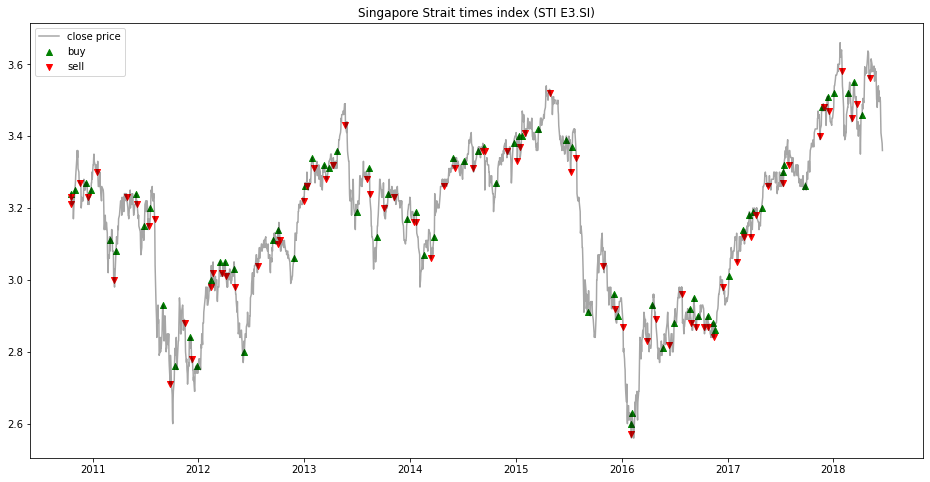

In [25]:
mpp.figure(figsize=(16,8))
# visualise the strategy
mpp.plot(df_new['Close'],color='black',label='close price',alpha=0.35)
mpp.scatter(df_new.index, df_new['sigBuyPrice'],label='buy',marker='^',color='green')
mpp.scatter(df_new.index, df_new['sigSellPrice'],label='sell',marker='v',color='red')
mpp.title('Singapore Strait times index (STI E3.SI)')
mpp.legend()
mpp.savefig('stietf')
mpp.show()

In [24]:
starting_amt = df_new['Close'].iloc[0]*df_new['portfolio_sma'].iloc[0] + df_new['cash_sma'].iloc[0]
print('starting amount : ', starting_amt)
current_amt = df_new['Close'].iloc[-1]*df_new['portfolio_sma'].iloc[-1] + df_new['cash_sma'].iloc[-1]
print('current amount : ',current_amt )
p_change = (current_amt - starting_amt)*100 / starting_amt
print('% change : ', p_change)
years =int( df_new.index[-1].year) -int( df_new.index[0].year) 
interest = p_change/years
print('annual interest : ', interest)

starting amount :  323.00000190734863
current amount :  409.51684907939045
% change :  26.78540144308075
annual interest :  3.348175180385094
